# Preparation

In [1]:
!pip install gdown
import gdown
import os
# Google Drive URL for the .txt file
gdrive_url = "https://drive.google.com/uc?id=1NXM_XsjctF46Y4Yc3lW0HVasAXwuPoIJ"

# Create the target directory for .txt content if it doesn't exist
target_directory_txt = "/content"

# Download the .txt file into the target directory
gdown.download(gdrive_url, os.path.join(target_directory_txt, "Cada.csv"), quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1NXM_XsjctF46Y4Yc3lW0HVasAXwuPoIJ
To: /content/Cada.csv
100%|██████████| 163M/163M [00:03<00:00, 49.7MB/s]


'/content/Cada.csv'

# Datasets

## Explore a dataset

Let's turn to an existing dataset, which you can find on data.gouv.fr. <a href="https://www.data.gouv.fr/fr/datasets/avis-et-conseils-de-la-cada/">here</a>.

This is a heavy file - we'll downsize it a bit later -, which collects all decisions by the CADA since its creation until May 2022, nearly 50,000 in total. We'll clean and perform basic analyses of this file, so as to answer a very simple and distinctive question: is the rate of positive/negative decisions by the CADA influenced by elections ?

(I recommend <a href="https://www.python-graph-gallery.com/cheat-sheets/">these cheatsheets</a> for everything we'll be learning in this and the next two parts.)

CSV cells, when opened in the MSExcel software, have a character limit (exactly 32,767 for a single cell, the same as an Excel, although the latter also have row and columns limits), and it's quite frequent that this is exceeded when dealing with texts.

Sure enough, this one has an error at some point, which is clearly visible when you open the file on MSExcel.

![](../Data/Images/cadafail.png)

This is not, however, an issue with pandas in this case (sometimes it can be, which would require you to clean the dataset first - for instance by removing lines that do not follow the normal structure of starting with a number ID, or lines where some columns are not properly filled in, etc.).

We can perform a tiny bit of data analysis already at this stage, looking at the type of data per column, or some basic description for our numerical columns.


In [ ]:
os.getcwd()

'/content'

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv("Cada.csv", header="infer", encoding="utf8")
df = df.fillna("") # A lot of the manipulation we'll do won't work if the dataframe has too many "N/A" values -
# and so we specify that all these empty values are actually empty strings
print(len(df))  # We check how long the dataframe is
print("___________")
print(df.head(15))  # We check that it is well-loaded by printing the top 15 rows
print("___________")
df.describe()

50639
___________
    Numéro de dossier                                     Administration  \
0            19840002                             ministre de la défense   
1            19840003                             ministre de la défense   
2            19850001  ministre de l'économie, des finances et du budget   
3            19860001  directeur départemental du travail et de l'emp...   
4            19870061                  gouverneur de la Banque de France   
5            19870380  directeur de la caisse régionale d'assurance m...   
6            19881774                       directeur général des impôts   
7            19881993                            ministre de l'intérieur   
8            19890099  ministre de l'intérieur (direction de la logis...   
9            19890845  ministre de la justice (direction de l'adminis...   
10           19900254                                 maire de Dunkerque   
11           19900695  chef de l'inspection générale des affaires soc.

,Numéro de dossier,Année
count,5.063900e+04,50639.000000
mean,2.016420e+07,2016.313711
std,4.048568e+04,4.113003
min,1.984000e+07,1984.000000
25%,2.014390e+07,2014.000000
50%,2.017160e+07,2017.000000
75%,2.019271e+07,2019.000000
max,2.021643e+07,2021.000000


A dataframe is a very powerful tool to analyse and extract insights from a dataset.

For instance, one question you migh ask is: what are the types of decisions in the dataset. In other words,  what's the distribution ? The `value_counts` method is particularly helpful here, especially when you normalise the data to have percentages.

Avis        0.940145
Conseil     0.059796
Sanction    0.000059
Name: Type, dtype: float64


<Axes: xlabel='Année'>

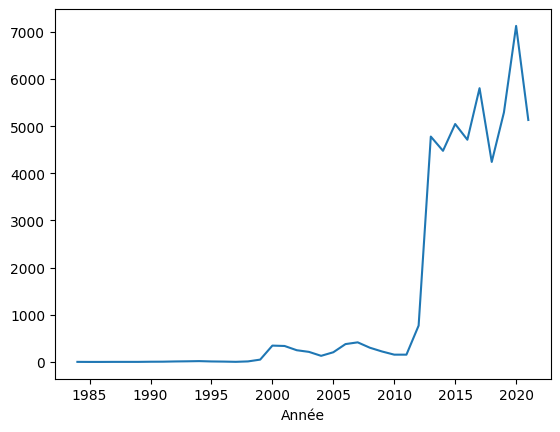

In [4]:
print(df.Type.value_counts(normalize=True))  # We can also multiply by * 100 to get proper percentages
df.groupby("Année").size().plot()  # We group by years, and then use plot the have an idea of the distribution

Année,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Type,,,,,,,,,,,,,,,,,,,,,
Avis,2.0,1.0,NaN,2.0,2.0,1.0,3.0,4.0,6.0,6.0,...,720.0,4618.0,4339.0,4833.0,4450.0,5573.0,3929.0,5010.0,6970.0,4983.0
Conseil,NaN,NaN,1.0,NaN,NaN,1.0,2.0,2.0,5.0,8.0,...,51.0,159.0,138.0,212.0,262.0,232.0,312.0,281.0,155.0,148.0
Sanction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


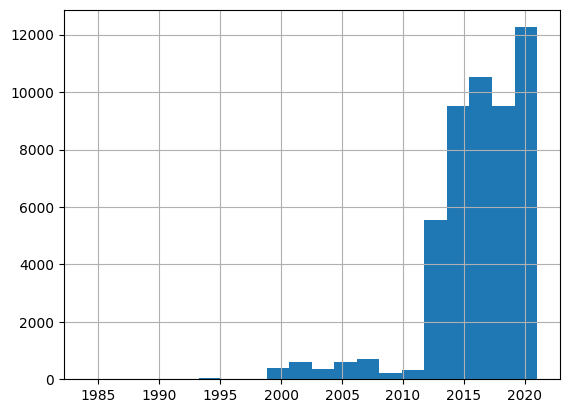

In [5]:
df.Année.hist(bins=20)  # Another approach is to use an histogram, with all years divided into x bins

df.groupby("Année").Type.value_counts().unstack(level=0)
# We combine both tools to get a broader type of chart, and then we unstack

Another question, since we have the Years, is to check the chronological evolution of the number of decisions. Here as well, we could use `value_counts`, but it's sometimes easier to group the dataframe by a data point (here, years) and then find out the size of every group.

This is where the module `pyplot` becomes useful and relevant. Shortly put, while `pandas` allows you to make basic plots, you often need other modules to fine-tune those plots. Pyplot provides the basics for this: the logic is that your plot is located in a `plt` element, which comes with a number of methods to act upon, e.g., the axes, the grid, colors, etc.

Another popular module in this context is `seaborn`, often abbreviated `sns`, which provides a number of ready-to-use graphs functions. This can also be used in parallel with pyplot and the basic plot tools of `pandas`.

<ipython-input-6-a81dcfa6451a>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.index = pd.to_datetime(df.Séance)  # To analyse time series, your dataframe should be indexed chronologically,
<ipython-input-6-a81dcfa6451a>:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df = df["2010-01-01":"2023-01-01"]  # Data before 2010 is not very relevant, let's cut it out by indexing


<Axes: xlabel='Séance'>

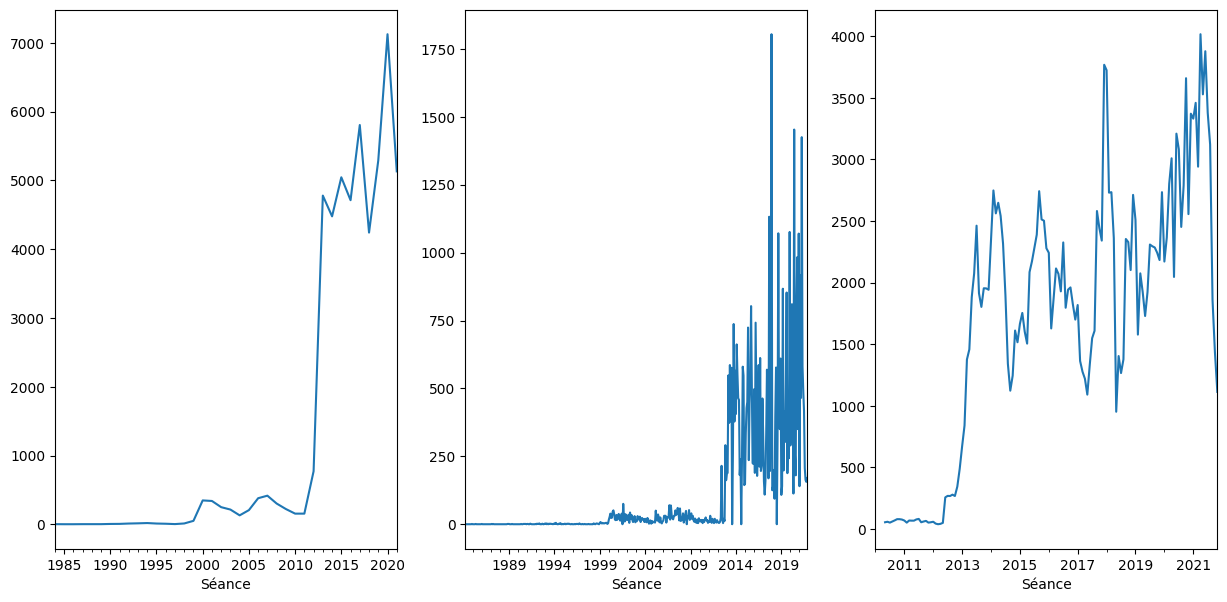

In [6]:
import matplotlib.pyplot as plt # This is a standard plotting module

df.index = pd.to_datetime(df.Séance)  # To analyse time series, your dataframe should be indexed chronologically,
# which you can do by replacing the index with this function that creates datetime objects from a column with dates
plt.figure(figsize=(15,7))  # To manage the following graphs, we initialise an empty plot
plt.subplot(131) # Then in that subplot we indicate that we want to have a suplot at that index
df.resample("1Y").size().plot()  # The method "resample" is equivalent to the groupby above, though it works on the index;
# since the index are dates,  you can resample by quarters, month, etc.
plt.subplot(132)
df.resample("1M").size().plot()
df = df["2010-01-01":"2023-01-01"]  # Data before 2010 is not very relevant, let's cut it out by indexing
x = df.resample("1M", convention="start").size()
xroll = x.rolling(5).sum() # Let's get a rolling average to get thing in better perspective
plt.subplot(133)
xroll.plot()

You can also be interested in locating specific items in the dataset. Here, `pandas` offers you plenty of ways to pinpoint a specific row, or colums, or cell - though it's not always intuitive. Once again, having an idea of the type of output will really help you understand how to manipulate all these. For instance, `.iloc` returns a row, while `.loc` returns another, smaller dataframe. `.at` returns a cell, because you need to specify both an index (row) and a column.

In [7]:
print(df.iloc[10])  # Compared to your Excel, pandas are shifted two indexes below, to account for 1. the headers, and
# 2. the fact that Python indexes start at 0
print("_______________")
print(df.loc[df.Année == "2010"])  # You specify a condition, and then obtain a smaller dataframe if you do not care for
# a particular column; notice that the type is important.
# Use the tilde ~ to specify a negative condition df.loc[~(XX) & (XX)]
print("_______________")
print(df.loc[df.Année == 2010][["Type", "Objet"]])  # You get more than one columns by using a double list

Numéro de dossier                                               20100369
Administration         inspecteur d'académie, directeur des services ...
Type                                                                Avis
Année                                                               2010
Séance                                                        28/01/2010
Objet                  La communication du fichier numérique de l'ens...
Thème et sous thème                      Travail Et Emploi/Emploi Public
Mots clés                                                       Carrière
Sens et motivation                             Favorable/Sauf vie privée
Partie                                                               III
Avis                   La secrétaire générale du SGEN-CFDT Midi-Pyrén...
Name: 2010-01-28 00:00:00, dtype: object
_______________
Empty DataFrame
Columns: [Numéro de dossier, Administration, Type, Année, Séance, Objet, Thème et sous thème, Mots clés, Sens et motivation,

## Synthetise Data

Your analyses will be more powerful if you are able to synthetise the data in the dataset.

For instance, when you look at the different results recorded in the `Sens et motivation` column, you can see that the categories are not super helpful. It'd be better to group them in two categories: favourable, and unfavourable (counting instances of "Incompétent", "Inexistant", etc. as unfavourable).

We might also want to group the different sorts of administrations, but this is harder, as they are many more categories. We can do a process of iterating through these until most have been tagged one way or another, and be happy with leaving the "Other" on the side.

In [8]:
import regex as re

print(df["Sens et motivation"].value_counts())

df["Result"] = ""  # We want to create a column that gives us the result, there are several ways to do it

for index, row in df.iterrows():  # One way would be to iterate over each row and check that the condition is met
    if re.search("défavorable", row["Sens et motivation"], re.S | re.I):
        # Note that we start with défavorable, because the term contains "favorable" in it, which could confuse the regex search
        df.at[index, "Result"] = "Unfavourable"
    elif re.search("favorable", row["Sens et motivation"], re.S | re.I):
        df.at[index, "Result"] = "Favourable"
    else:
        df.at[index, "Result"] = "Unfavourable"

Favorable                                                                                                                                                             13019
Sans objet/Communiqué                                                                                                                                                  6160
Sans objet/Inexistant                                                                                                                                                  1837
Favorable/Sauf vie privée                                                                                                                                              1626
Favorable/Sauf commercial industriel                                                                                                                                   1029
                                                                                                                                            

In [ ]:
def resultsearch(value):  # A second way would be to use function that will do the same,
    # and apply it to the dataframe with ".apply"
    if re.search("défavorable", value, re.S|re.I):
        return "Unfavourable"
    elif re.search("favorable", value, re.S|re.I):
        return "Favourable"
    else:
        return "Unfavourable"

df["Result"] = df["Sens et motivation"].apply(lambda x: resultsearch(x))
# This allows you to apply a function to a value, which is represented by "x" here

Favourable      60.393818
Unfavourable    39.606182
Name: Result, dtype: float64
_______________


<Axes: xlabel='Année'>

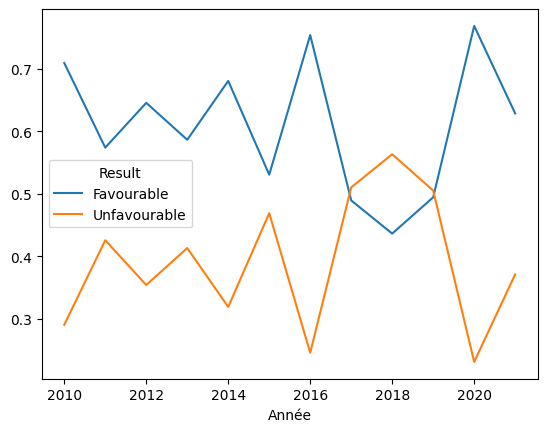

In [9]:
print(df.Result.value_counts(normalize=True) * 100)  # We obtain percent of favourable decisions
print("_______________")
df.groupby("Année").Result.value_counts(normalize=True).unstack().plot()
# And then we plot it. See that the low number of entries for earlier years makes it harder to draw conclusions.

To further answer the question about the number of decisions around the elections, we will also need to synthetise the "Administration" column - which, like "Sens et motivation", has too many different values to be useful.

In [11]:
print("There are ", df["Administration"].nunique(), " different values for Administration in the dataset...")


dict_admin = {"[Mm]airie": "Municipal", "[Rr]égion": "Regional", "[dD]epartment": "Department",
        "[Mm]inist|[Pp]réfec?t": "Central"}  # We create a that will link some regexes to synthetise values. For instance,
# we can expect that all values having the term "[Mm]inist" pertain to the central administration

def apply_type(value): # The function will loop over the dict's keys
    for key in dict_admin:
        if re.search(key, value.strip(), re.S | re.I):
            return dict_admin[key]
    return "Other"

df["Admin"] = df.Administration.astype(str).apply(lambda x: apply_type(x)) # We apply the function to the Administration column,
# creating a new "Admin" column with synthetised value
print(df.Admin.value_counts()) # And now we check how many rows we managed to synthetise - e.g., how many "Other" remain
print("_______________")

# Since there are still many "Other", we return to the data to check what they refer to in general, trying to find
# Further rules to add to our dictionary
print(df.loc[df.Admin == "Other"].Administration.value_counts()[:20])
# Locating with Python using a condition. You'll note for instance that acronymes with a number are often departemental
# admins, whereas the use of the term "national" indicate central administration

There are  12838  different values for Administration in the dataset...
Other        23453
Municipal    13113
Central       8882
Regional      2239
Name: Admin, dtype: int64
_______________
Direction générale des finances publiques (DGFIP)                              1575
Assistance Publique-Hôpitaux de Paris (AP-HP)                                   609
X, député                                                                       420
La Poste                                                                        205
Direction générale des patrimoines                                              204
Pôle emploi                                                                     152
X, députée                                                                      147
Caisse interprofessionnelle de prévoyance et d'assurance vieillesse (CIPAV)     109
Orange Groupe                                                                   105
Office français de l'immigration et de l'intégration (

In [12]:
dict_admin = {"[Mm]airie|agglom|commune": "Municipal", "[Rr]égion": "Regional", "[dD]epartment|\d\d\)?$": "Department",
        "[Mm]inist|[Pp]réfec?t|[Ddirection [Gg]énérale|[Nn]ational|[Ff]rançais|[Uu]niversit|[A-Z-]+\)?$": "Central"}
# We add these new rules and terms to our regex, and redo the process

df["Admin"] = df.Administration.astype(str).apply(lambda x: apply_type(x))  # We reapply with broader dict

print(df.Admin.value_counts())  # If the number of others is negligible, we consider that the job is done

Central       24167
Municipal     14745
Department     6040
Regional       2219
Other           516
Name: Admin, dtype: int64


In [13]:
sns.set_style("dark")  # Change style of plots with sns
sns.countplot(x="Admin", hue="Result", data=df)   # Seaborn has great plot types such as this simple countplot


NameError: ignored

## Analyses

One of the easiest analyses you could make is to check if the differences in your data are statistically relevant. Here, it seems that it is harder to get a document from a central administration than from a regional or departmental administration. But are the differences in the rates of success over the years truly statistically different ?

To investigate this, we can do a t-test, which checks if two groups of data are from the same population (which means they would have a similar mean).
(In theory, a t-test does not work well in these circumstances since the samples do not necessarily follow a normal distribution and their variance differs. But this is just for the demonstration.)

In [14]:
df.groupby("Admin").Result.value_counts(normalize=True).unstack()
# As you can see, it's a bit harder to get a document from a Central administration,
# and a bit easier to get them from municipalities

cent_fav_per_year = df.groupby(["Année", "Admin"]).Result.value_counts(normalize=True).unstack()[
    "Favourable"].unstack()["Central"] # We extract a Series with the percent of unfav decisions over the years for both the
# Central and Regional administrations
reg_fav_per_year = df.groupby(["Année", "Admin"]).Result.value_counts(normalize=True).unstack()[
    "Unfavourable"].unstack()["Regional"]
print(cent_fav_per_year.dropna())

from scipy import stats # a statistics module

stats.ttest_ind(cent_fav_per_year.dropna().values.tolist(), reg_fav_per_year.dropna().values.tolist(), equal_var=False)
# The t-test function takes only lists of numbers, so we drop the "N/A" values and convert series to lists
# Since the p-value is above 0.5, we cannot conclude that the samples are that different

Année
2010    0.711268
2011    0.554745
2012    0.627854
2013    0.566396
2014    0.686107
2015    0.542309
2016    0.753264
2017    0.514695
2018    0.415181
2019    0.517428
2020    0.788920
2021    0.644991
Name: Central, dtype: float64


TtestResult(statistic=5.825867025626372, pvalue=7.65540861755202e-06, df=21.752472105862932)

Now, once we have done all this, we can check one of the first questions we had: does the CADA slows down before elections take place ?

One way to look at it is simply to plot the number of decisions, and indicate the relevant election (Présidentielle for the Central administration, etc.) with a line. Doing this, it's hard to detect a role for elections in the rate of favourable opinions from the CADA, although it seems that the number of decisions decreases as election approaches.

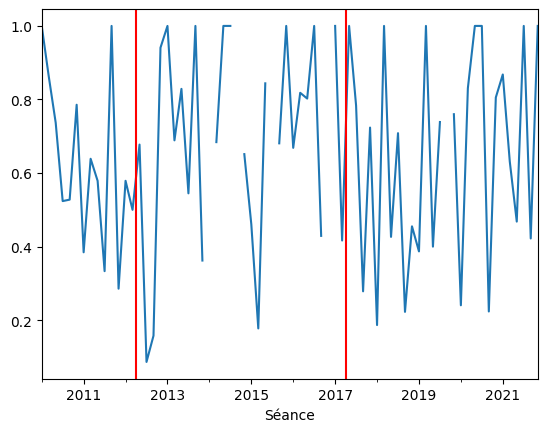

In [15]:
ax = df.loc[df.Admin == "Central"].resample("2M").Result.value_counts(normalize=True).unstack()["Favourable"].plot()
# Next we look at the number of decisions per month, focusing on Favourable results.
# We pass it to an object ax that will represent our plot
ax.axvline("2022-04-23", color="red")  # We add a line to indicate the presidential elections' rough date
ax.axvline("2017-04-23", color="red")
ax.axvline("2012-04-23", color="red")

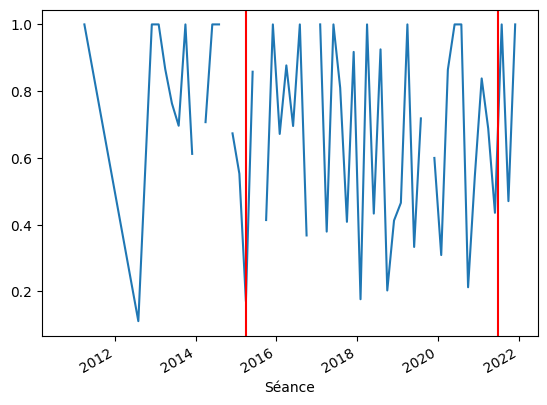

In [16]:
df.loc[df.Admin == "Department"].resample("2M").Result.value_counts(normalize=True).unstack()["Favourable"].plot()
# Now the same for departmental elections
plt.axvline("2021-06-29", color="red")
plt.axvline("2015-03-29", color="red")

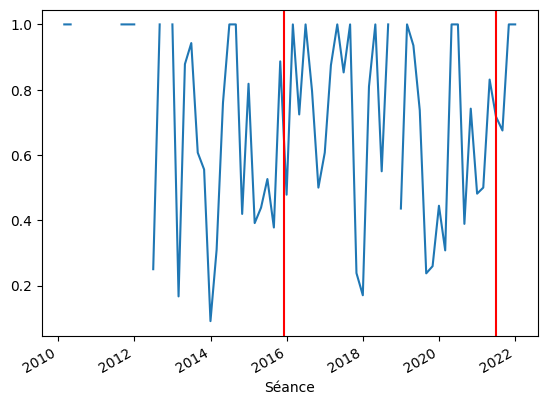

In [17]:
df.loc[df.Admin == "Regional"].resample("2M").Result.value_counts(normalize=True).unstack()["Favourable"].plot()
# Now the same for regional elections
plt.axvline("2021-06-29", color="red")
plt.axvline("2015-12-10", color="red")

Therefore, we see little evidence that favourable decisions drop before an election.

A second Analysis we could do is to track the average length of time it takes the CADA to issue a decision (which, in theory, should issue a decision at most one month after a saisine).

To do this, we first need to extract the date of Saisine from the CADA's decisions.

In [ ]:
df["Séance"]

Séance
2010-01-14    14/01/2010
2010-01-14    14/01/2010
2010-01-14    14/01/2010
2010-01-14    14/01/2010
2010-01-14    14/01/2010
                 ...    
2010-09-23    23/09/2010
2010-09-09    09/09/2010
2010-09-09    09/09/2010
2010-09-09    09/09/2010
2010-07-27    27/07/2010
Name: Séance, Length: 94, dtype: object

In [19]:
# Second analysis: the average length to get a CADA decision

import locale
#locale.setlocale(locale.LC_ALL, "fr_FR")  # Depending on your OS, you may not be set to work with French data and format -
# such as dates - so we first need to set that

df["Séance"] = pd.to_datetime(df["Séance"], format="%d/%m/%Y")
df["Saisine"] = df.Avis.astype(str).str.extract("(\d\d? [a-z]+ \d{4})")
# We create a new column by looking into the text of the avis and extracting a date with a regex pattern

print(df.Saisine.value_counts())  # We check, and this is not ideal, many false dates have inserted themselves
df["Saisine"] = df.Avis.astype(str).str.extract("le (\d\d? [a-z]{3,} \d{4})")
# One better way is to check for dates starting by "le", since most avis refer to a courrier "envoyé le"
print("______________")
print(df.Saisine.value_counts()) # This is better

17 juillet 1978    1575
8 juillet 2017      570
39 et 2019          359
28 mai 1982         263
30 mars 2016        192
                   ... 
29 juin 2010          1
07 et 2012            1
30 avril 2000         1
10 juillet 2011       1
8 octobre 2021        1
Name: Saisine, Length: 3519, dtype: int64
______________
8 juillet 2017      569
27 juillet 2020     184
12 juillet 2021     121
24 juillet 2017     112
6 janvier 2021       91
                   ... 
8 septembre 2013      1
15 mars 2012          1
8 septembre 2011      1
04 janvier 2015       1
8 octobre 2021        1
Name: Saisine, Length: 2817, dtype: int64


ValueError: ignored

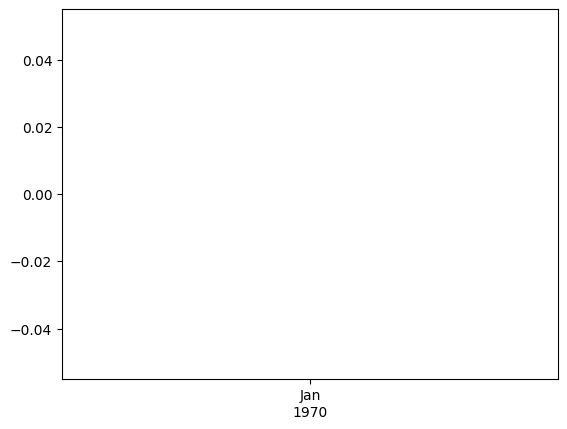

In [20]:
df["DateS"] = pd.to_datetime(df["Saisine"], format="%d %B %Y", errors="coerce")
# Then we can convert the dates found to a datetime object; we "coerce" to ignore errors (wrong format, etc.)

df["Delta"] = df["Séance"] - df["DateS"]  # We obtain the delta between the two dates
df["Days"] = df.Delta.apply(lambda x: x.days)
# And then fetch the number of days from the datetime values in the delta column. Again, the function apply allows
# you to work on the data in the columns immediately. Since the Delta data is datetime, we can get the .days attribute

df.loc[(df.Days > 0) & (df.Days < 300)].resample("3M").Days.mean().plot()  # Finally, we plot the results of our dataframe,
# removing outliers (negative deltas and deltas over 300 days)

We observe the for a long time the delays were increasing very rapidly. Yet, something happened around 2020, which helped the CADA deal with applications much more quickly.